In [ ]:
pip install category_encoders

     |████████████████████████████████| 82 kB 248 kB/s 


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##mlp wit normalize and pca

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import pandas as pd
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/aics/assinmen1/traindata.csv') 
df.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,0,tcp,http,SF,295,2584,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,0.0,0.0,0.0,0.0,1.0,0.0,0.67,101,255,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0
1,1,0,tcp,http,SF,312,839,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,7,0.0,0.0,0.0,0.0,1.0,0.0,0.29,223,255,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0
2,2,0,tcp,ftp,SF,1225,2451,0,0,0,28,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,116,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1
3,3,0,tcp,http,SF,293,296,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.50,216,255,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0
4,4,0,tcp,X11,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.5,1.0,0.5,1.0,0.00,115,1,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11,0


In [ ]:
df['Class'].unique()

array([0, 1])

In [ ]:
df['Class'].value_counts()

0    12001
1    11001
Name: Class, dtype: int64

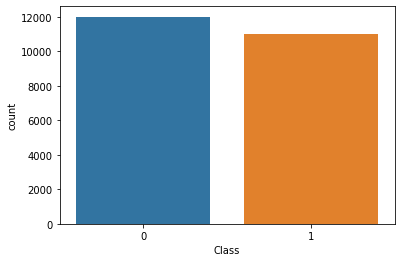

In [ ]:
sns.countplot(data=df, x='Class')

In [ ]:
df.corr()['Class'].sort_values(ascending=False)

Class                          1.000000
dst_host_srv_serror_rate       0.649963
dst_host_serror_rate           0.647599
serror_rate                    0.646637
srv_serror_rate                0.644097
count                          0.576296
dst_host_count                 0.368795
dst_host_srv_rerror_rate       0.258675
rerror_rate                    0.258556
dst_host_rerror_rate           0.258102
srv_rerror_rate                0.257691
dst_host_diff_srv_rate         0.236590
diff_srv_rate                  0.192442
wrong_fragment                 0.096417
dst_host_same_src_port_rate    0.090074
dst_host_srv_diff_host_rate    0.063555
duration                       0.049368
urgent                         0.006887
src_bytes                      0.005829
srv_count                      0.002368
ID                             0.002328
num_failed_logins              0.002050
land                           0.000406
dst_bytes                     -0.010218
hot                           -0.012829


In [ ]:
#plt.figure(figsize=(12,8), dpi=150)
#sns.heatmap(df.corr(), annot=True)

////////////////////////////////////////////////////////////////////////////

#feature selection with corrolation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

np.random.seed(123)

In [ ]:
corr = df.corr()
corr.head()

,ID,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
ID,1.000000,0.007389,0.005243,-0.006789,-0.001609,-0.006230,0.007798,-0.003133,0.014354,-0.002099,-0.004341,0.003294,-0.004647,-0.004050,-0.000504,-0.006458,-0.006990,NaN,NaN,-0.006906,0.000265,-0.000602,0.004464,0.004424,0.000406,0.001034,-0.003087,-0.007818,-0.002237,-0.001745,0.000221,-0.000965,-0.005386,0.006612,0.000721,0.004693,0.004989,-0.004455,-0.001690,0.004852,0.002328
duration,0.007389,1.000000,0.088331,0.013308,-0.001062,-0.010514,-0.000511,0.004456,0.004990,-0.062312,0.095046,0.055417,0.092524,0.094214,0.091354,-0.002124,0.075553,NaN,NaN,-0.003928,-0.083171,-0.040672,-0.074079,-0.073535,0.211239,0.210213,0.077576,-0.012714,-0.041082,0.054042,-0.111151,-0.117807,0.259286,0.240562,-0.025089,-0.068168,-0.067890,0.187384,0.209588,-0.155431,0.049368
src_bytes,0.005243,0.088331,1.000000,0.003633,-0.000096,-0.000943,-0.000066,0.000879,-0.000258,-0.002260,-0.000198,-0.000387,-0.000267,-0.000210,-0.000230,-0.000158,-0.000415,NaN,NaN,-0.000950,-0.007532,-0.003688,-0.006538,-0.006474,0.016745,0.016532,0.007985,-0.003325,-0.003214,-0.010150,-0.008619,-0.006956,0.000941,0.002093,-0.001329,-0.006577,-0.006457,-0.002164,0.006505,-0.033698,0.005829
dst_bytes,-0.006789,0.013308,0.003633,1.000000,-0.000362,-0.003588,0.000341,0.002278,0.004401,0.010959,0.032127,0.020948,0.031127,0.031823,0.007976,-0.000725,0.024751,NaN,NaN,-0.001229,-0.027938,-0.012424,-0.022563,-0.022608,-0.013852,-0.013681,0.030274,-0.012325,-0.007478,-0.031920,-0.000996,0.023659,-0.013036,0.026058,-0.005917,-0.015361,-0.014300,-0.014093,-0.012857,-0.068322,-0.010218
land,-0.001609,-0.001062,-0.000096,-0.000362,1.000000,-0.000861,-0.000061,-0.000857,-0.000237,-0.007402,-0.000200,-0.000364,-0.000253,-0.000199,-0.000265,-0.000174,-0.000393,NaN,NaN,-0.000895,-0.006892,-0.003364,0.014608,0.014647,-0.003495,-0.003501,0.007342,-0.003295,0.014682,-0.017264,-0.008999,0.010138,-0.004149,0.025677,0.055126,0.014686,0.005657,-0.003619,-0.003510,-0.047857,0.000406


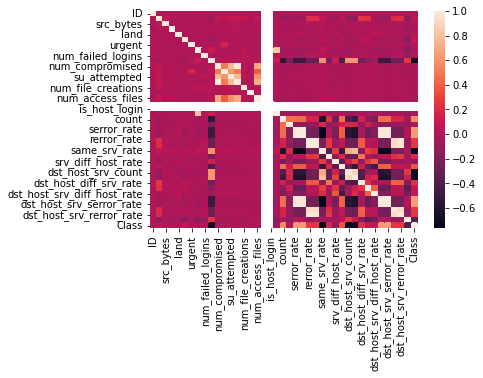

In [ ]:
sns.heatmap(corr)

,,,,,,,,

In [ ]:
X = df.drop(['Class'], axis=1)



# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['ID', 'duration', 'protocol_type', 'service', 'flag', 'src_bytes'])


X= encoder.fit_transform(X)
#housing = pd.read_csv("/content/sample_data/california_housing_train.csv")
scaler = preprocessing.MinMaxScaler()
names =X.columns
d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=names)
X.head()




y = df['Class']

In [ ]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Feature 0: 0.158278
Feature 1: 71.361139
Feature 2: 36.318040
Feature 3: 3940.429360
Feature 4: 12412.077730
Feature 5: 4412.541973
Feature 6: 4.040334
Feature 7: 1.095076
Feature 8: 167.565352
Feature 9: 1.095076
Feature 10: 2.636786
Feature 11: 0.085269
Feature 12: 16917.331116
Feature 13: 7.249167
Feature 14: 6.482113
Feature 15: 12.700067
Feature 16: 7.900748
Feature 17: 9.528476
Feature 18: 6.396246
Feature 19: 28.920664
Feature 20: nan
Feature 21: nan
Feature 22: 24.156159
Feature 23: 9175.138550
Feature 24: 0.665296
Feature 25: 13313.454259
Feature 26: 13148.573695
Feature 27: 1322.241916
Feature 28: 1319.826234
Feature 29: 22938.933969
Feature 30: 726.762497
Feature 31: 265.188902
Feature 32: 2855.214171
Feature 33: 20001.240656
Feature 34: 17286.466439
Feature 35: 1133.474727
Feature 36: 155.630996
Feature 37: 78.036808
Feature 38: 13289.740237
Feature 39: 13517.265643
Feature 40: 1312.243104
Feature 41: 1325.845923
Feature 42: 2973.139719


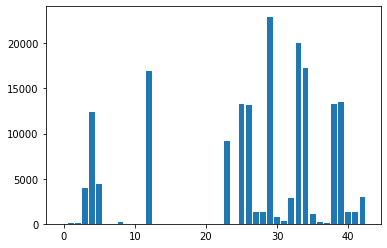

In [ ]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

##featureselection correlation

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
#corr_features = correlation(X_train, 0.7)
#len(set(corr_features))

12

In [ ]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

13

In [ ]:
corr_features

{'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'is_guest_login',
 'num_access_files',
 'num_root',
 'same_srv_rate',
 'srv_rerror_rate',
 'srv_serror_rate',
 'su_attempted'}

In [ ]:
X=X.drop(corr_features,axis=1)

In [ ]:
#X_train.drop(corr_features,axis=1)
#X_test.drop(corr_features,axis=1)

In [ ]:
X.shape

(23002, 30)

https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb

//////////////////////////////////////////////////////////////////////////////////////////////////////////
https://www.datacamp.com/community/tutorials/feature-selection-python

https://www.kaggle.com/bbloggsbott/feature-selection-correlation-and-p-value

In [ ]:
# Applying PCA function on training
# and testing set of X component
"""
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_



"""

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
#clf =MLPClassifier(hidden_layer_sizes=(50, ), max_iter=150, alpha=1e-4,solver='sgd', tol=1e-4, random_state=3,learning_rate_init=.1)

In [ ]:
#clf = MLPClassifier(random_state=9, max_iter=300)50 /150 /2

clf =MLPClassifier(solver='lbfgs', hidden_layer_sizes=50,max_iter=150, shuffle=True, random_state=2,activation='logistic', alpha=1e-5)

clf.fit(X, y)






/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=150,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
"""
clf = MLPClassifier(random_state=9, max_iter=1000)

clf.fit(X_train, y_train)

"""

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=9, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#y_pred=clf.predict(X_test)

In [ ]:
# Check accuracy score 





"""
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

clf.score(X_test, y_test)

print(classification_report(y_pred,y_test))


confusion_matrix(y_test, y_pred) 
"""

"\nfrom sklearn.metrics import accuracy_score\n\nprint('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))\n\n\n"

In [ ]:
X_test1 = pd.read_csv('/content/drive/MyDrive/aics/assinmen1/testdata.csv')

In [ ]:
scaler = preprocessing.MinMaxScaler()
names =X_test1.columns
X_test1 = encoder.transform(X_test1)
d = scaler.fit_transform(X_test1)

X_test1 = pd.DataFrame(d, columns=names)
X_test1.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0.000000,0.018576,0.0,0.246154,0.0,0.089581,0.000069,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.000000,0.909804,0.91,0.04,0.00,0.00,0.0,0.0,0.0,0.0,0.761905
1,0.000044,0.003096,0.0,0.076923,0.2,0.003812,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469667,0.009785,1.0,1.0,0.0,0.0,0.02,0.07,0.0,1.000000,0.019608,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0,1.000000
2,0.000089,0.003096,0.5,0.076923,0.0,0.303050,0.000040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.000000,1.000000,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0.809524
3,0.000133,0.003096,0.0,0.030769,0.0,0.268742,0.000437,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.031373,1.000000,1.00,0.00,0.12,0.06,0.0,0.0,0.0,0.0,1.000000
4,0.000178,0.003096,1.0,0.384615,0.0,0.283355,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608611,0.608611,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.000000,1.000000,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0.857143


In [ ]:
"""

pca = PCA(n_components = 2)
#fit بلاش فقشىسبخقة جاب ايرور
X_test1 = pca.fit_transform(X_test1)




"""

In [ ]:
X_test1=X_test1.drop(corr_features,axis=1)

In [ ]:
predictions1 = clf.predict(X_test1)
predictions1

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
predictions1 = clf.predict(X_test1)
predictions1
import numpy as np
import pandas as pd
prediction1 = pd.DataFrame(predictions1, columns=['Class']).to_csv('predictionmlppcanormalize22.csv')

##2svm

In [ ]:
"""
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
# iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 1000]}
svc = svm.SVC()
clf1 = GridSearchCV(svc, parameters)
clf1.fit(X_train, y_train)


"""

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 1000], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred2=clf1.predict(X_test)

In [ ]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2380
           1       1.00      1.00      1.00      2221

    accuracy                           1.00      4601
   macro avg       1.00      1.00      1.00      4601
weighted avg       1.00      1.00      1.00      4601



In [ ]:
confusion_matrix(y_test, y_pred2) 

array([[2375,    8],
       [   5, 2213]])

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
# iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 1000]}
svc = svm.SVC()
clf1 = GridSearchCV(svc, parameters)
clf1.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 1000], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
predictionssvm = clf1.predict(X_test1)
predictionssvm
import numpy as np
import pandas as pd
pd.DataFrame(predictionssvm, columns=['Class']).to_csv('selecclf1nssvmnormalize2.csv')

##gridsearch2

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.992, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.989, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.989, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.991, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.989, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.976, total=   3.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.972, total=   2.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.970, total=   2.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.975, total=   2.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

In [ ]:

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
# train the model on train set
model = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2383
           1       0.99      0.99      0.99      2218

    accuracy                           0.99      4601
   macro avg       0.99      0.99      0.99      4601
weighted avg       0.99      0.99      0.99      4601



In [ ]:
confusion_matrix(y_test, predictions) 

array([[2364,   19],
       [   7, 2211]])

##3Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [ ]:
decision_tree = DecisionTreeClassifier(criterion="gini",random_state=9, max_depth=10,min_samples_split=4,min_samples_leaf=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

In [ ]:
# print prediction results
predictions2=decision_tree.predict(X_test)
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2383
           1       0.99      1.00      0.99      2218

    accuracy                           0.99      4601
   macro avg       0.99      0.99      0.99      4601
weighted avg       0.99      0.99      0.99      4601



In [ ]:
confusion_matrix(y_test, predictions2) 

array([[2364,   19],
       [   7, 2211]])

##4rondomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomForest = RandomForestClassifier(max_depth=9, random_state=200)
randomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=200,
                       verbose=0, warm_start=False)

In [ ]:
# print prediction results
predictions3 =randomForest.predict(X_test)
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       1.00      1.00      1.00      2218

    accuracy                           1.00      4601
   macro avg       1.00      1.00      1.00      4601
weighted avg       1.00      1.00      1.00      4601



In [ ]:
confusion_matrix(y_test, predictions3) 

array([[2375,    8],
       [   2, 2216]])

In [ ]:
predictionsrandomForest = clf1.predict(X_test1)
predictionsrandomForest
import numpy as np
import pandas as pd
pd.DataFrame(predictionsrandomForest, columns=['Class']).to_csv('selecclf1nssrandomForestnormalize.csv')

##5knn
For better results, normalizing data on the same scale is highly recommended. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
print(predicted)

[1 0 0 ... 1 0 0]


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       1.00      1.00      1.00      2218

    accuracy                           1.00      4601
   macro avg       1.00      1.00      1.00      4601
weighted avg       1.00      1.00      1.00      4601



In [ ]:
confusion_matrix(y_test, predicted) 

array([[2376,    7],
       [   7, 2211]])

In [ ]:
predictionsknn = model.predict(X_test1)
predictionsknn
import numpy as np
import pandas as pd
pd.DataFrame(predictionsknn, columns=['Class']).to_csv('predictionpsknnpcanormalize.csv')

#kknn elbow to get num k

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
test_error_rates = []


for k in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

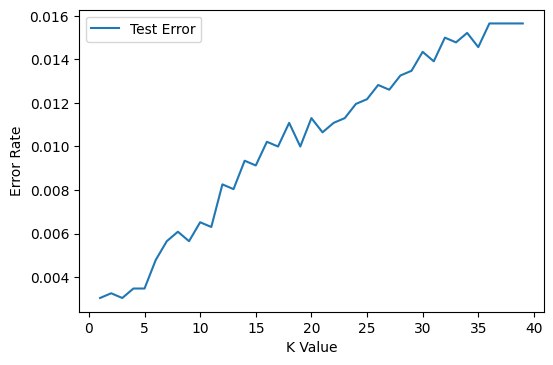

In [ ]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,40),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

k=3 because num classes is even 0,1 so choose odd k and 3 is minum error